# 🗎 Анализ научной статьи

Сдайте  отчет с описанием статьи в виде блокнота ipynb или текстового документа (Word).
В отчете Вы должны продемонстрировать умение создания структурированного текста со ссылками и нумерованными списками.
Можно вместе с отчетом прикрепить полный текст статьи, особенно если ее трудно найти в открытом доступе.
Оценка включает устное сообщение на семинаре в группе.


## Требования к статье

Необходимо найти статью на интересную тему по специальности, ознакомиться с содержанием (прочитать) и извлечь признаки для описания проведенного в работе анализа данных.
Ожидается, что это свежая экспериментальная статья с участием животных на английском языке в открытом журнале с доступом к исходным данным. Допускается статья в русскоязычном журнале при проблемах с английским языком. Допускается обзорная статья, если в ней проводился статистический мета-анализ.

Формальные требования:
1. Полная статья в профильном журнале по биологии (медицине) выпуска за последние три года или препринт.
2. Желательно открытый доступ к данным.

Этапы описания:
1. Выходные данные статьи (ссылка, [квартиль по Scopus](https://www.scimagojr.com/journalrank.php?area=3400)) (см. [Анализ публикационного ландшафта](i_quartile.ipynb))
1. Объект исследования (вид животного);
1. Измеряемые зависимые параметры (приборы, единицы, предобработка);
1. Повторы, объем выборки (ограничения, контроль);
1. Факторы (уровни сравнения);
1. Методы статистики (для описания можно выбрать один, если в работе несколько разных анализов);
1. Что нужно, чтобы повторить?  Найти соответствующий метод в пакете scipy.stats или statsmodels или описать специальный модуль для нестандартного метода.

In [1]:
import scipy.stats
import statsmodels

### Пример

Gut microbiota dynamics in Parkinsonian mice  (Динамика микробиоты кишечника у мышей с паркинсонизмом)

журнал: ACS Chemical Neuroscience

адрес: https://pubs.acs.org/doi/abs/10.1021/acschemneuro.0c00386
([полный текст](https://sci-hub.do/https://doi.org/10.1021/acschemneuro.0c00386))


:::{figure-md} article1
![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](i/article1.png)

Схема развития болезни Паркинсона
:::


- объект: микробиота кишечника мыши
- субъект: особь мыши M83 (склонность к накоплению альфа-синуклеина + введение α-syn)
- N: 17. 10 повторов терапии, остальное - контроль.
- образцы: фекалии, возобновляемость ~ 1 час. (57 шт.), но брали раз в 1.5 месяца. (ограниченный доступ к сложному анализу?)
- измеряемые показатели: образцы [16S рибосомальной РНК](https://en.wikipedia.org/wiki/16S_ribosomal_RNA) (1 115 уникальных [OTU](https://en.wikipedia.org/wiki/Operational_taxonomic_unit) из 1,340,271 ридов)
- предобработка: стандартные методы при амплификации в пакете QIIME2 на Python.
- расчетные параметры: филогенетическая дистанция [UniFrac](https://en.wikipedia.org/wiki/UniFrac) (разработан в 2005) в пакете Phyloseq на R.
- факторы: воздействие (терапия, контроль (соляной раствор)), время после инъекции (0, 6, 12 недель)
- гипотеза: разный кластеринг таксономических групп бактерий в динамике болезни/лечения.
- методы статистики: 
    - непарный U-тест Манна-Уитни и корректировка с использованием метода Бенджамини-Хохберга - для оценки различия в показателях альфа-разнообразия между группами в каждый момент времени;
    - тест Вальда (Wald's) - для идентификации тех ОТЮ, которые были значительно отличались по обильности ОТЮ между группами в каждый момент времени;
    - Permutational multivariate analysis of variance (PERMANOVA) из пакета vegan на R - для оценки различий в невзвешенных измерениях дистанции UniFrac между группами с течением времени.

Чтобы повторить:
- виварий с данной линией мышей.
- средства для клеточной терапии.
- контейнеры для доставки кала в лабораторию.
- амплификация.
- пакет анализа [QIIME2](https://qiime2.org/) (знание языка Python)
- RStudio с пакетом расчета UniFrac (знание языка R)
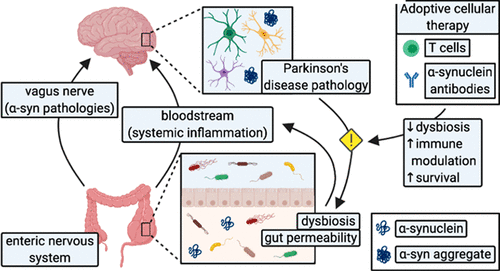

> Если способы анализа Вас заинтересовали, то оцените доступность использованных в статье методов анализа в программных пакетах на Python.
Если найти готовые реализации не удалось, приведите ссылки на формальное описание метода (статья в Википедии, оригинальная статья авторов метода).

- Тест Манна-Уитни доступен в пакете `scipy.stats`.
```py
scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)
    #Compute the Mann-Whitney rank test on samples x and y.
```    

- Метод `results.wald_test()` встроен в OLS в statsmodels.

- `PERMANOVA` доступна в пакете [skbio](http://scikit-bio.org/docs/0.2.3/generated/generated/skbio.stats.distance.permanova.html)
```skbio.stats.distance.permanova() ```
или через вызов функции Adonis https://rdrr.io/rforge/vegan/man/adonis.html



### Пример

https://www.elibrary.ru/item.asp?id=43938827

:::{figure-md} article2
![](i/article2.png)

Выходные данные статьи на сайте РИНЦ
:::

- объект: воздействие препаратов на кровь и клещей
- субъект: особь кошки.
- образцы: 36 кровь в начале и конце лечения, 3 группы по 6 животных в каждой группе.
- измеряемые показатели: наличие/отсутствие клещей в соскобе, гематологические показатели
- предобработка: стандартный общий и биохимический анализ крови
- расчетные параметры: -
- факторы: методы лечения 3 шт.
- гипотеза: препараты действуют одинаково.
- методы статистики: критерий Стьюдента
    
Чтобы повторить:
- лечить котов с ушными клещами разными препаратами
- брать на анализ кровь и соскоб в начале и конце лечения
- сравнить средние по выборкам тестом Стьюдента

:::{seealso}
При возникновении сложности с получением полнотекстовой версии, попробуйте поискать копию статьи на других сайтах.

Актуальный адрес сайта sci-hub для доступа к полным текстам можно узнать в https://vk.com/sci_hub
:::